In [1]:
%run globals

In [2]:
f = open("timefreq.pkl","rb")
mydict = pickle.load(f,encoding='latin1')
f.close()
freq_valuesEven,time_valuesEven,freq_valuesOdd,time_valuesOdd,freq,soIX = mydict

f = open("time_freq_all.pkl","rb")
mydict = pickle.load(f,encoding='latin1')
f.close()
# stacked as 10 trials per participant, 7 participants
freq_values_all,time_values_all,freq,soIX = mydict

Nsubj = 7
Ntrial = 10

idx = soIX
even = idx[0::2]
odd = idx[1::2]
base = 20 # Hz
stim = freq[idx]/base

nan = np.nan*np.zeros_like(stim)
zeros = np.zeros_like(stim)

# *not used*

In [3]:
# from su17v3.py
scale = 2.0477514910123609

# from globals.py
SLIDER_MIN = 0.
SLIDER_MAX = 4096.
SLIDER_SCALE = 5.

# from experiment.py
def rescale_inp(inp,MIN=SLIDER_MIN,MAX=SLIDER_MAX):
  return 2 * ( (inp - MIN) / (MAX - MIN) - .5) * scale * (3./2.)

# input scale

In [4]:
fft = lambda sig : np.fft.fft(sig)[:sig.size//2]/(np.fft.fft(np.ones((sig.size//2,)))[0]*2)
ifft = lambda SIG : (np.fft.ifft(np.hstack((SIG,SIG[::-1])))*(np.fft.fft(np.ones((SIG.size//2,)))[0]*2)).real

M = lambda s : 1/(s**2 + s)
soc = lambda s,f,t : 2*np.sum(np.abs(s)*np.cos(2*np.pi*(t[:,np.newaxis])*f+np.angle(s)),axis=1)

Mstim = M(1.j*2*np.pi*stim)

Wrmax = []

#plt.figure()

evenodd = ''

for subj in range(Nsubj):
    for trial in range(Ntrial):
        data = time_values_all[subj*Ntrial+trial]
        Data = freq_values_all[subj*Ntrial+trial]

        t = data['times']

        R = np.asarray(Data['REFS'],dtype=np.complex128)
        Y = np.asarray(Data['OUTS'],dtype=np.complex128)

        if np.abs(R[odd]/Y[odd]).max() > 1e-1:
            rid = odd; did = even
            evenodd += 'O'
        else:
            rid = even; did = odd
            evenodd += 'E'

        WR = R[rid] / M(1.j*2*np.pi*freq[rid]/base)
        Wr = soc(WR,freq[rid]/base,t)
        
        #plt.plot(t,Wr)
        
        Wrmax.append(np.abs(Wr).max())
    evenodd += ' '
        
#plt.xlim(10,30)
        
Wrmax = np.asarray(Wrmax)

print('Wrmax: ',Wrmax.max())

Wrmax:  2.3530657851649623


In [5]:
Wrmax.mean()

2.063798906111039

In [6]:
evenodd

'OEEOEEOEOE OEEOEEOEOE OEEOEEOEOE OEEOEEOEOE OEEOEEOEOE OEEOEEOEOE OEEOEEOEOE '

# even or odd?

In [7]:
Nsubj = 7
Ntrial = 10

#subj = 0 
#trial = 0 

#subj = Nsubj-1
#trial = Ntrial-1 

#subj = np.random.choice(Nsubj)
#trial = np.random.choice(Ntrial)

subj = 2
trial = 9

data = time_values_all[subj*Ntrial+trial]; Data = freq_values_all[subj*Ntrial+trial]

print('subj:',subj,'; trial:',trial)

R = np.asarray(Data['REFS'],dtype=np.complex128)
Y = np.asarray(Data['OUTS'],dtype=np.complex128)
#print('odd: %0.1f'%np.abs(R[odd]/Y[odd]).max())
#print('even: %0.1f'%np.abs(R[even]/Y[even]).max())

if np.abs(R[odd]/Y[odd]).max() > 1e-1:
    rid = odd; did = even
    print('R odd')
else:
    rid = even; did = odd
    print('R even')

rstim = freq[rid]/base; dstim = freq[did]/base
#data = time_values_all[subj*Ntrial+trial]; Data = freq_values_all[subj*Ntrial+trial]

#R = np.asarray(Data['REFS'],dtype=np.complex128)
#Y = np.asarray(Data['OUTS'],dtype=np.complex128)
#print('rid: %0.1f'%np.abs(R[rid]/Y[rid]).max())
#print('did: %0.1f'%np.abs(R[did]/Y[did]).max())

subj: 2 ; trial: 9
R even


# data

In [8]:
fft = lambda sig : np.fft.fft(sig)[:sig.size//2]/(np.fft.fft(np.ones((sig.size//2,)))[0]*2)
ifft = lambda SIG : (np.fft.ifft(np.hstack((SIG,SIG[::-1])))*(np.fft.fft(np.ones((SIG.size//2,)))[0]*2)).real

M = lambda s : 1/(s**2 + s)
soc = lambda s,f,t : 2*np.sum(np.abs(s)*np.cos(2*np.pi*(t[:,np.newaxis])*f+np.angle(s)),axis=1)

Mstim = M(1.j*2*np.pi*stim)

ramp = 5. # sec

t = data['times'] - ramp

# !!! allow complex numbers for MD when casting !!!
Md = np.asarray(data['dists'],dtype=np.float128)
MD = np.asarray(Data['DISTS'],dtype=np.complex128)
r = np.asarray(data['refs'],dtype=np.float128)
R = np.asarray(Data['REFS'],dtype=np.complex128)

D = MD[did] / M(1.j*2*np.pi*freq[did]/base)
d = soc(D,freq[did]/base,t)

WR = R[rid] / M(1.j*2*np.pi*freq[rid]/base)
Wr = soc(WR,freq[rid]/base,t)

u = data['inps']
U = Data['INPS']
MU = U * M(1.j*2*np.pi*freq/base)

u_ = soc(U,freq/base,t)

y = np.asarray(data['outs'],dtype=np.float128)
Y = np.asarray(Data['OUTS'],dtype=np.complex128)


# for sanity checks -- not currently used
if 0:
    WY = Y / M(1.j*2*np.pi*freq/base)
    WY[0] = 0
    Wy = soc(WY,freq/base,t)

    MU = U * M(1.j*2*np.pi*freq/base)
    MU[0] = 0
    Mu = soc(MU,freq/base,t)


    assert np.allclose(fft(Md),MD)
    assert np.allclose(ifft(fft(Md)),ifft(MD))
    #assert np.allclose(ifft(fft(Md)),Md)
    #assert np.allclose(Md,ifft(MD))

<ipython-input-8-3dcf21f83628>:4: RuntimeWarning: divide by zero encountered in true_divide
  M = lambda s : 1/(s**2 + s)
<ipython-input-8-3dcf21f83628>:4: RuntimeWarning: invalid value encountered in true_divide
  M = lambda s : 1/(s**2 + s)
<ipython-input-8-3dcf21f83628>:27: RuntimeWarning: invalid value encountered in multiply
  MU = U * M(1.j*2*np.pi*freq/base)


# plotting variables

In [9]:
sout = 100/2
sinp = 50/(3*Wrmax.mean())
sinpu = 1. # sinp

lw = 2
ms = 12

xlimtime = (10,30)

ytickstimeout = [-25,0,+25]
ylimtimeout = [-50,+50]

ytickstimeinp = [-25,0,+25]
ylimtimeinp = [-25,+25]

yticksfreqout = [0,5,10]
ylimfreqout = [0,10]

yticksfreqinp = [0,5,10]
ylimfreqout = [0,10]

# output time-domain

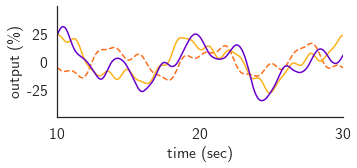

In [10]:
fname = 'output_time'

plt.figure(figsize=(2*.75*columnwidth,.75*columnwidth))
ax = plt.subplot(111)

ax.plot(t,sout*Md,'--',color=colors['d'],label=r'$M d$')
ax.plot(t,sout*r,color=colors['r'],label=r'$r$')
ax.plot(t,sout*y,color=colors['y'],label=r'$y$')

ax.set_xlabel('time (sec)')
ax.set_ylabel('output (\%)')

ax.set_xlim(xlimtime)
ax.set_xticks(np.arange(xlimtime[0],xlimtime[1]+1,10))

ax.set_ylim(ylimtimeout)
ax.set_yticks(ytickstimeout)

ax.set_xticklabels(['%0.0f'%t for t in ax.get_xticks()], **font)
ax.set_yticklabels(['%0.0f'%t for t in ax.get_yticks()], **font)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.legend(ncol=3)

plt.tight_layout()

fig = plt.gcf()
for fmt in fmts:
    if not(os.path.exists(fmt)): os.mkdir(fmt)
    fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

plt.show()

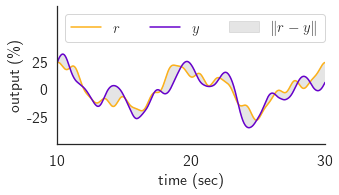

In [11]:
fname = 'r-y'

plt.figure(figsize=(5,3))
ax = plt.subplot(111)

ax.plot(t,sout*r,color=colors['r'],label=r'$r$')
ax.plot(t,sout*y,color=colors['y'],label=r'$y$')
ax.fill_between(t,sout*r,sout*y,color='gray',alpha=.2,label=r'$\|r-y\|$')

plt.legend(ncol=3,loc='upper left',fontsize=15)

ax.set_xlabel('time (sec)')
ax.set_ylabel('output (\%)')

ax.set_xlim(xlimtime)
ax.set_xticks(np.arange(xlimtime[0],xlimtime[1]+1,10))

ax.set_ylim(ylimtimeout[0],1.5*ylimtimeout[1])
ax.set_yticks(ytickstimeout)

ax.set_xticklabels(['%0.0f'%t for t in ax.get_xticks()], **font)
ax.set_yticklabels(['%0.0f'%t for t in ax.get_yticks()], **font)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.legend(ncol=3)

plt.tight_layout()

fig = plt.gcf()
for fmt in fmts:
    if not(os.path.exists(fmt)): os.mkdir(fmt)
    fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

plt.show()

In [12]:
%run globals

#fmts = []

# output frequency-domain

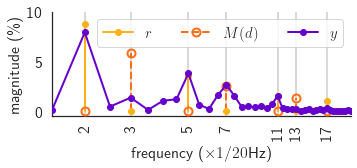

In [13]:
fname = 'output_freq'

plt.figure(figsize=(2*.75*columnwidth,.75*columnwidth))
ax = plt.subplot(111)

ax.plot(np.vstack((nan,stim,stim,nan)).T.flatten(),
        np.vstack(( nan, zeros, abs(sout*R[idx]), nan )).T.flatten(),
        '-',color=colors['r'],lw=lw,ms=ms,zorder=1)
ax.plot(stim,abs(sout*R[idx]),
        '.',color=colors['r'],lw=lw,ms=ms,zorder=10)
ax.plot([],[],'.-',label=r'$r$',color=colors['r'],lw=lw,ms=ms)

ax.plot(np.vstack((nan,stim,stim,nan)).T.flatten(),
        np.vstack(( nan, zeros, abs(sout*MD[idx]), nan )).T.flatten(),
        '--',color=colors['d'],lw=lw,ms=ms/1.5,mfc=(0,0,0,0),mec=colors['d'],zorder=1)
ax.plot(stim,abs(sout*MD[idx]),
        'o',color=colors['d'],lw=lw,ms=ms/1.5,mfc=(0,0,0,0),mec=colors['d'],mew=lw,zorder=10)
ax.plot([],[],'o--',label=r'$M(d)$',color=colors['d'],lw=lw,ms=ms/1.5,mfc=(0,0,0,0),mec=colors['d'],mew=lw)


ax.plot   (freq/base,abs(sout*Y),'.-',color=colors['y'],label=r'$y$',zorder=10,lw=lw,ms=ms)

ax.set_yticks(yticksfreqout)

ax.set_yticklabels(['%0.0f'%t for t in ax.get_yticks()], **font)
ax.set_ylabel('magnitude (\%)')

ax.set_xscale("log", nonposx='clip')
ax.set_xticks(soIX/2.0/20)
#ax.set_xticklabels((soIX/2.0/20),rotation=90)
#ax.set_xlabel(r'frequency (Hz)')
ax.set_xticklabels((soIX//2),rotation=90)
ax.set_xlabel(r'frequency ($\times 1/20$Hz)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.set_xlim((1.5/base,21.0/base))

ylim = ax.get_ylim()
ylim = (ylim[0],ylim[1]*1.)
ax.plot(np.vstack((stim,stim)),np.array([ylim]).T,'k-',zorder=-1,color=(.8,.8,.8))
ax.set_ylim(ylim)

plt.legend(ncol=3,loc='upper right',fontsize=15)

plt.tight_layout()

fig = plt.gcf()
for fmt in fmts:
    if not(os.path.exists(fmt)): os.mkdir(fmt)
    fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)
    
plt.show()

In [14]:
freq[:40]

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5])

In [15]:
%run globals

#fmts = []

# input time-domain

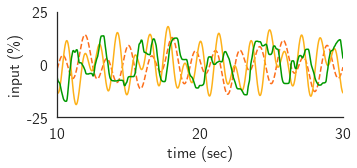

In [16]:
fname = 'input_time'

plt.figure(figsize=(2*.75*columnwidth,.75*columnwidth))
ax = plt.subplot(111)

#ax.plot(times,s*ifft(MD),color='k',label=r'$\Gamma^{-1}(\widehat{M} d)$')

ax.plot(t,sinp*d,'--',color=colors['d'],label=r'$d$')
ax.plot(t,sinp*Wr,'-',color=colors['r'],label=r'$M^{-1} r$')
ax.plot(t,sinp*u_,'-',color=colors['u'],label=r'$u$')
#ax.plot(t,u,'-',color=colors['u'],label=r'$u$')
#ax.plot(t,u,'k--',label=r'$u$',lw=2)

ax.set_xlabel('time (sec)')
ax.set_ylabel('input (\%)')


ax.set_xlim(xlimtime)
ax.set_xticks(np.arange(xlimtime[0],xlimtime[1]+1,10))

ax.set_ylim(ylimtimeinp)
ax.set_yticks(ytickstimeinp)

ax.set_xticklabels(['%0.0f'%t for t in ax.get_xticks()], **font)
ax.set_yticklabels(['%0.0f'%t for t in ax.get_yticks()], **font)

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

#plt.legend(ncol=3)

plt.tight_layout()

fig = plt.gcf()
for fmt in fmts:
    if not(os.path.exists(fmt)): os.mkdir(fmt)
    fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

plt.show()

In [17]:
%run globals.py

#fmts = []

# input frequency-domain

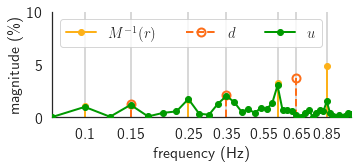

In [18]:
fname = 'input_freq'

plt.figure(figsize=(2*.75*columnwidth,.75*columnwidth))
ax = plt.subplot(111)

nan = np.nan*np.zeros_like(stim)
zeros = np.zeros_like(stim)
rnan = np.nan*np.zeros_like(rstim)
rzeros = np.zeros_like(rstim)
dnan = np.nan*np.zeros_like(dstim)
dzeros = np.zeros_like(dstim)


ax.plot(np.vstack((rnan,rstim,rstim,rnan)).T.flatten(),
        np.vstack(( rnan, rzeros, abs(sinp*WR), rnan )).T.flatten(),
        '-',color=colors['r'],lw=lw,ms=ms,mfc=(0,0,0,0),mec=colors['r'],zorder=1)
ax.plot(rstim,abs(sinp*WR),
        '.',color=colors['r'],lw=lw,ms=ms,zorder=10)
ax.plot([],[],'.-',label=r'$M^{-1}(r)$',color=colors['r'],lw=lw,ms=ms)

ax.plot(np.vstack((dnan,dstim,dstim,dnan)).T.flatten(),
        np.vstack((dnan, dzeros, abs(sinp*D), dnan )).T.flatten(),
        '--',color=colors['d'],lw=lw,ms=ms/1.5,mfc=(0,0,0,0),mec=colors['d'],zorder=1)
ax.plot(dstim,abs(sinp*D),
        'o',color=colors['d'],lw=lw,ms=ms/1.5,mfc=(0,0,0,0),mec=colors['d'],mew=lw,zorder=10)
ax.plot([],[],'o--',label=r'$d$',color=colors['d'],lw=lw,ms=ms/1.5,mfc=(0,0,0,0),mec=colors['d'],mew=lw)


ax.plot(freq/base,abs(sinp*U),'.-',color=colors['u'],label=r'$u$',zorder=10,lw=lw,ms=ms)

ax.set_yticks(yticksfreqinp)

ax.set_yticklabels(['%0.0f'%t for t in ax.get_yticks()], **font)
ax.set_ylabel('magnitude (\%)')

ax.set_xscale("log", nonposx='clip')
ax.set_xticks(soIX/2.0/20)
ax.set_xticklabels((soIX/2.0/20))#,rotation=90)
ax.set_xlabel(r'frequency (Hz)')
#ax.set_xticklabels((soIX//2),rotation=90)
#ax.set_xlabel(r'frequency ($\times 1/20$Hz)')

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

plt.xlim((1.5/base,21.0/base))

ylim = ylimfreqout
ylim = (ylim[0],ylim[1]*1.)
ax.plot(np.vstack((stim,stim)),np.array([ylim]).T,'k-',zorder=-1,color=(.8,.8,.8))
ax.set_ylim(ylimfreqout)

plt.legend(ncol=3,loc='upper left',fontsize=15)

plt.tight_layout()

xtl = ax.xaxis.get_majorticklabels()
plt.setp(xtl[4],ha='right')

#print(xtl[4])

fig = plt.gcf()
for fmt in fmts:
    if not(os.path.exists(fmt)): os.mkdir(fmt)
    fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

plt.show()

In [74]:
stim

array([0.1 , 0.15, 0.25, 0.35, 0.55, 0.65, 0.85])

In [73]:
freq[:40]

array([ 0. ,  0.5,  1. ,  1.5,  2. ,  2.5,  3. ,  3.5,  4. ,  4.5,  5. ,
        5.5,  6. ,  6.5,  7. ,  7.5,  8. ,  8.5,  9. ,  9.5, 10. , 10.5,
       11. , 11.5, 12. , 12.5, 13. , 13.5, 14. , 14.5, 15. , 15.5, 16. ,
       16.5, 17. , 17.5, 18. , 18.5, 19. , 19.5])

In [116]:
%run globals.py

#fmts = []

# sanity checks on input -- FAILING

In [126]:
MU

array([            nan           +nanj, -1.80393138e-02-4.89217862e-02j,
       -2.26988316e-02-3.43064227e-02j, ...,
        8.68491636e-09-1.48735506e-09j,  1.03443624e-08+8.93574270e-10j,
        8.04465908e-09-1.34905387e-11j])

In [128]:
MD[idx] + MU[idx] - Y[idx]

array([-0.21173231-0.30634014j, -0.00589712-0.00311406j,
        0.0727309 -0.04851414j, -0.00170525+0.00190519j,
        0.01905565-0.02725325j, -0.00120648+0.00031019j,
        0.01336597-0.01552565j])

/home/sburden/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/sburden/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.
/home/sburden/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


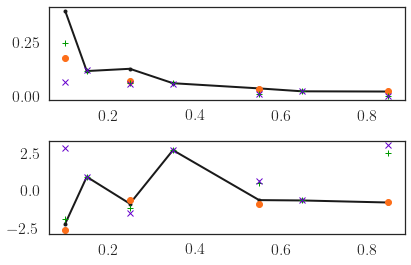

In [226]:
M = lambda s : 1/(s**2 + s)

MD = np.asarray(Data['DISTS'],dtype=np.complex128)

U = Data['INPS']
MU = U * M(1.j*2*np.pi*freq/base)

Y = np.asarray(Data['OUTS'],dtype=np.complex128)

plt.figure()

ax = plt.subplot(211)
ax.plot(stim,np.abs(MU[idx]+MD[idx]),'k.-',lw=2,label=r'$Mu + Md$')
ax.plot(freq[did]/base,np.abs(MD[did]),'o',label=r'$Md$',color=colors['d'])
ax.plot(stim,np.abs(MU[idx]),'+',label=r'$Mu$',color=colors['u'])
ax.plot(stim,np.abs(Y[idx]),'x',label=r'$y$',color=colors['y'])

ax = plt.subplot(212)
ax.plot(stim,np.angle(MU[idx]+MD[idx]),'k.-',lw=2,label=r'$Mu + Md$')
ax.plot(freq[did]/base,np.angle(MD[did]),'o',label=r'$Md$',color=colors['d'])
ax.plot(stim,np.angle(MU[idx]),'+',label=r'$Mu$',color=colors['u'])
ax.plot(stim,np.angle(Y[idx]),'x',label=r'$y$',color=colors['y'])

plt.tight_layout()

In [144]:
MD[idx]/(Y[idx] - MU[idx])

array([-3.99164500e-01+5.94172439e-01j, -2.67174741e-15-4.32110391e-15j,
       -3.02806373e+00+1.89149418e+00j,  3.22871218e-15+9.37187132e-15j,
       -2.10750837e+01+6.84148080e+00j, -1.11496143e-14+8.88732679e-15j,
        2.84876545e+01+5.67665690e+01j])

In [140]:
Y[idx] - MU[idx]

array([ 0.04943496+0.23993821j,  0.00589712+0.00311406j,
       -0.01942776+0.00292116j,  0.00170525-0.00190519j,
       -0.00113666+0.0008823j ,  0.00120648-0.00031019j,
       -0.00012919-0.00029801j])

In [107]:
D.shape

(4,)

In [113]:
U[did]+D - WY[did]

array([ 0.27606775-0.0120971j , -0.10325048+0.23394926j,
       -0.13338638+0.39131591j, -0.29832175+0.51422432j])

In [99]:
%run globals

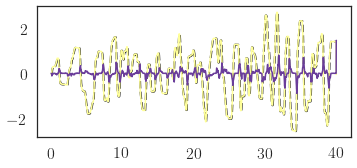

In [100]:
plt.figure(figsize=(2*.75*columnwidth,.75*columnwidth))
ax = plt.subplot(111)

ax.plot(t,u,'k--',lw=2)
ax.plot(t,u_)
ax.plot(t,u - u_)

plt.tight_layout()

plt.show()

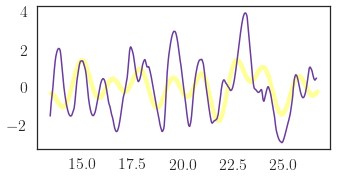

In [102]:
plt.figure(figsize=(2*.75*columnwidth,.75*columnwidth))
ax = plt.subplot(111)

_ = np.arange(800,1600)

ax.plot(t[_],Wy[_],'.')
#ax.plot(t[_],u[_])
#ax.plot(t[_],d[_])
ax.plot(t[_],u[_]+d[_])

plt.show()

In [29]:
Wy

array([  -86.80393778,    44.93393092,   -27.27700784, ...,
        1001.03629034, -1020.42300238,   216.17742411])

In [84]:
d

array([-1.01790451, -1.14645094, -1.26702812, ..., -0.5923888 ,
       -0.74003039, -0.88215759])

In [128]:
MD[idx] + MU[idx] - Y[idx]

array([-0.21173231-0.30634014j, -0.00589712-0.00311406j,
        0.0727309 -0.04851414j, -0.00170525+0.00190519j,
        0.01905565-0.02725325j, -0.00120648+0.00031019j,
        0.01336597-0.01552565j])

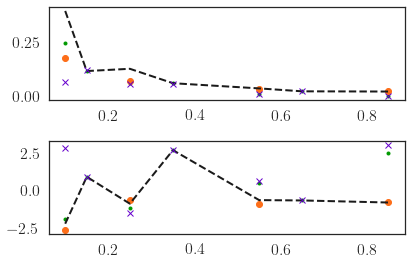

In [139]:
plt.figure()

ax = plt.subplot(211)
ax.plot(stim,np.abs(MU[idx]),'.',label=r'$Mu$',color=colors['u'])
ax.plot(freq[did]/base,np.abs(MD[did]),'o',label=r'$Md$',color=colors['d'])
ax.plot(stim,np.abs(MU[idx]+MD[idx]),'k--',lw=2,label=r'$Mu + Md$')
ax.plot(stim,np.abs(Y[idx]),'x',label=r'$y$',color=colors['y'])

ax = plt.subplot(212)
ax.plot(stim,np.angle(MU[idx]),'.',label=r'$Mu$',color=colors['u'])
ax.plot(freq[did]/base,np.angle(MD[did]),'o',label=r'$Md$',color=colors['d'])
ax.plot(stim,np.angle(MU[idx]+MD[idx]),'k--',lw=2,label=r'$Mu + Md$')
ax.plot(stim,np.angle(Y[idx]),'x',label=r'$y$',color=colors['y'])

plt.tight_layout()

In [144]:
MD[idx]/(Y[idx] - MU[idx])

array([-3.99164500e-01+5.94172439e-01j, -2.67174741e-15-4.32110391e-15j,
       -3.02806373e+00+1.89149418e+00j,  3.22871218e-15+9.37187132e-15j,
       -2.10750837e+01+6.84148080e+00j, -1.11496143e-14+8.88732679e-15j,
        2.84876545e+01+5.67665690e+01j])

In [140]:
Y[idx] - MU[idx]

array([ 0.04943496+0.23993821j,  0.00589712+0.00311406j,
       -0.01942776+0.00292116j,  0.00170525-0.00190519j,
       -0.00113666+0.0008823j ,  0.00120648-0.00031019j,
       -0.00012919-0.00029801j])

In [107]:
D.shape

(4,)

In [113]:
U[did]+D - WY[did]

array([ 0.27606775-0.0120971j , -0.10325048+0.23394926j,
       -0.13338638+0.39131591j, -0.29832175+0.51422432j])

# table 1

In [19]:
s*(Wr.max() - Wr.min())

NameError: name 's' is not defined

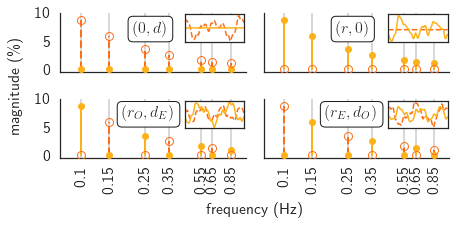

In [20]:
fname = 'table1'

de = time_valuesEven
do = time_valuesOdd

De = freq_valuesEven
Do = freq_valuesOdd
s = 100/2

fig,axs = plt.subplots(2,2,figsize=(7,4),sharex=True,sharey=True)

lw = 2
ms = 12
yticks = [0,5,10]
tlim = [20,40]
ylim = (-.5,10.)

def freqins(ax,d,D,insylabel='',ticklabels=True):
    ax.plot(np.vstack((nan,stim,stim,nan)).T.flatten(),
            np.vstack(( nan, zeros, abs(s*D['REFS'][idx]), nan )).T.flatten(),
            '-',color=colors['r'],lw=lw,ms=ms,zorder=1)
    ax.plot(stim,abs(s*D['REFS'][idx]),
            '.',color=colors['r'],lw=lw,ms=ms,zorder=10)
    ax.plot([],[],'.-',label=r'$r$',color=colors['r'],lw=lw,ms=ms)

    ax.plot(np.vstack((nan,stim,stim,nan)).T.flatten(),
            np.vstack(( nan, zeros, abs(s*D['DISTS'][idx]), nan )).T.flatten(),
            '--',color=colors['d'],lw=lw,ms=ms/1.5,mfc=(0,0,0,0),mec=colors['d'],zorder=1)
    ax.plot(stim,abs(s*D['DISTS'][idx]),
            'o',color=colors['d'],lw=lw,ms=ms/1.5,mfc=(0,0,0,0),mec=colors['d'],zorder=10)
    ax.plot([],[],'o--',label=r'$M d$',color=colors['d'],lw=lw,ms=ms/1.5,mfc=(0,0,0,0),mec=colors['d'])

    axins = ax.inset_axes([0.67, 0.5, 0.32, 0.47])
    axins.plot(d['times'],s*d['dists'],'--',color=colors['d'],label=r'$M d$')
    axins.plot(d['times'],s*d['refs'],color=colors['r'],label=r'$r$')
    #axins.set_ylabel(insylabel,rotation=90)
    axins.set_xlim(tlim)
    axins.set_xticks([])
    axins.set_yticks([])
    
    bbox = dict(boxstyle="round",fc='w',ec='k')
    if '_' in insylabel:
        ax.annotate(insylabel,(3.6/base,6.4),xycoords='data',bbox=bbox,zorder=10)
    else:
        ax.annotate(insylabel,(4.2/base,6.4),xycoords='data',bbox=bbox,zorder=10)

    ax.set_yticks(yticks)

    ax.set_xscale("log", nonposx='clip')
    ax.set_xticks(soIX/2.0/20)

    if ticklabels:
        ax.set_yticklabels(['%0.0f'%t for t in ax.get_yticks()], **font)
        #ax.set_xticklabels((soIX//2),rotation=90)
        ax.set_xticklabels((soIX//2/20),rotation=90)
        #ax.set_xticklabels(stim,rotation=90)
        xtl = ax.xaxis.get_majorticklabels()
        #plt.setp(xtl[4],ha='right')
    else:
        ax.set_xticklabels([])
        ax.set_yticklabels([])
    #ax.set_ylabel('magnitude (\%)')
    #ax.set_xlabel('frequency (Hz)')

    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    ax.set_xlim((1.5/base,21.0/base))
    ax.plot(np.vstack((stim,stim)),np.array([ylim]).T,'k-',zorder=-1,color=(.8,.8,.8))
    ax.set_ylim(ylim)
    
d = dict(times=de['times'],dists=de['dists']+do['dists'],refs=0*de['refs'])
D = dict(DISTS=De['DISTS']+Do['DISTS'],REFS=0*De['REFS'])
freqins(axs[0,0],d,D,insylabel=r'$(0,d)$')

d = dict(times=de['times'],dists=0*de['dists'],refs=de['refs']+do['refs'])
D = dict(DISTS=0*De['DISTS'],REFS=De['REFS']+Do['REFS'])
freqins(axs[0,1],d,D,insylabel=r'$(r,0)$')

d = dict(times=de['times'],dists=de['dists'],refs=de['refs'])
D = dict(DISTS=De['DISTS'],REFS=De['REFS'])
freqins(axs[1,0],d,D,insylabel=r'$(r_O,d_E)$')

d = dict(times=do['times'],dists=do['dists'],refs=do['refs'])
D = dict(DISTS=Do['DISTS'],REFS=Do['REFS'])
freqins(axs[1,1],d,D,insylabel=r'$(r_E,d_O)$')

fig.add_subplot(111, frameon=False)
plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
plt.ylabel(r"magnitude (\%)",labelpad=0)
xl = plt.xlabel(r"frequency (Hz)",labelpad=20)
#xl = plt.xlabel(r"frequency ($\times 1/20$\,Hz)")

plt.tight_layout()

fig = plt.gcf()
for fmt in fmts:
    if not(os.path.exists(fmt)): os.mkdir(fmt)
    fig.savefig(os.path.join(fmt,fname+'.'+fmt),bbox_inches='tight',pad_inches=0)

plt.show()

In [15]:
%run globals

#fmts = []

# Q:  FFT represents signal as sum-of-cosines?

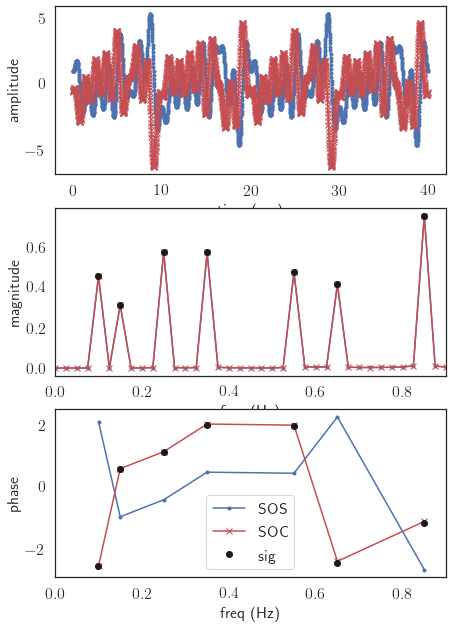

In [26]:
import numpy as np

primes = np.array([2, 3, 5, 7, 11, 13, 17])
freqs = primes / base
amps = np.random.rand(primes.size)
phases = 2*np.pi*(np.random.rand(primes.size)-.5)

fft = lambda sig : np.fft.fft(sig)[:sig.size//2]/(np.fft.fft(np.ones((sig.size//2,)))[0]*2)
sos = lambda t : 2*np.sum(amps * np.sin( 2*np.pi*freqs*t[:,np.newaxis] + phases ),axis=1)
soc = lambda t : 2*np.sum(amps * np.cos( 2*np.pi*freqs*t[:,np.newaxis] + phases ),axis=1)

T = 40 # sec
R = 60 # samples * Hz = samples/sec
t = np.linspace(0,T,T*R) # sec
f = np.linspace(0,T*R//4,T*R//2)/base # Hz = 1/sec
i = primes*2

s = sos(t) # time-domain signal
c = soc(t) # time-domain signal
S = fft(s) # frequency-domain signal
C = fft(c) # frequency-domain signal

xlim = (0,freqs[-1]+1/base)

fig = plt.figure(figsize=(7,10.5))

ax = plt.subplot(3,1,1)
ax.plot(t,s,'b.-')
ax.plot(t,c,'rx-')
ax.set_xlabel('time (sec)')
ax.set_ylabel('amplitude')

ax = plt.subplot(3,1,2)
ax.plot(f,np.abs(S),'b.-')
ax.plot(f,np.abs(C),'rx-')
ax.plot(freqs,amps,'ko')
ax.set_xlabel('freq (Hz)')
ax.set_ylabel('magnitude')
ax.set_xlim(xlim)

ax = plt.subplot(3,1,3)
ax.plot(f[i],np.angle(S)[i],'b.-',label='SOS')
ax.plot(f[i],np.angle(C)[i],'rx-',label='SOC')
ax.plot(freqs,phases,'ko',label='sig')
ax.set_xlabel('freq (Hz)')
ax.set_ylabel('phase')
ax.set_xlim(xlim)
ax.legend()

plt.show();

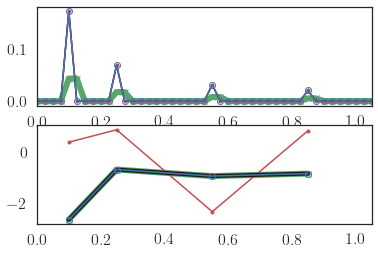

In [262]:
#fftscale = np.fft.fft(np.ones((1200,)))[0]*2
#fft = lambda sig : np.fft.fft(sig)[:sig.size//2]/fftscale
#ifft = lambda SIG : np.fft.ifft(np.hstack((SIG,SIG[::-1])))*fftscale

#id = odd
#d = time_valuesEven
#D = freq_valuesEven

id = even
data = time_valuesOdd
DATA = freq_valuesOdd

Md = data['dists']
MD = DATA['DISTS']

# MD is the Fourier transform of Md
assert np.allclose(fft(Md),MD)

times = data['times']
Md_ = lambda t : np.sum(2*np.abs(MD[id])*np.cos(2*np.pi*t*freq[id]/base + np.angle(MD[id])),axis=1)
Md_SAM = Md_(times[:,np.newaxis])

Md_ifft = ifft(MD)

# this assert fails -- WHY ???
#assert np.allclose(fft(Md),fft(Md_SAM))

fig = plt.figure()
ax = plt.subplot(2,1,1)
ax.plot(freq/base,np.abs(fft(Md_ifft)),'gx-',lw=6)
ax.plot(freq/base,np.abs(fft(Md_SAM)),'r.-')
ax.plot(freq/base,np.abs(fft(Md)),'k')
ax.plot(freq/base,np.abs(MD),'bo-',mfc=(0,0,0,0),mec='b')
ax.set_xlim((0,21.0/base))
ax = plt.subplot(2,1,2)
ax.plot(freq[id]/base,np.angle(fft(Md_ifft))[id],'gx-',lw=6)
ax.plot(freq[id]/base,np.angle(fft(Md_SAM))[id],'r.-')
ax.plot(freq[id]/base,np.angle(fft(Md))[id],'k',lw=4)
ax.plot(freq[id]/base,np.angle(MD)[id],'bo-',mfc=(0,0,0,0),mec='b')
ax.set_xlim((0,21.0/base));

# raw

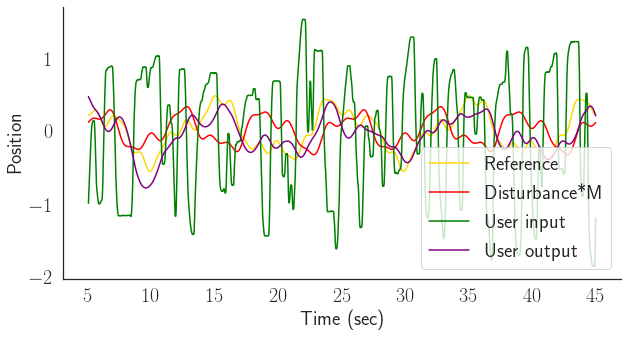

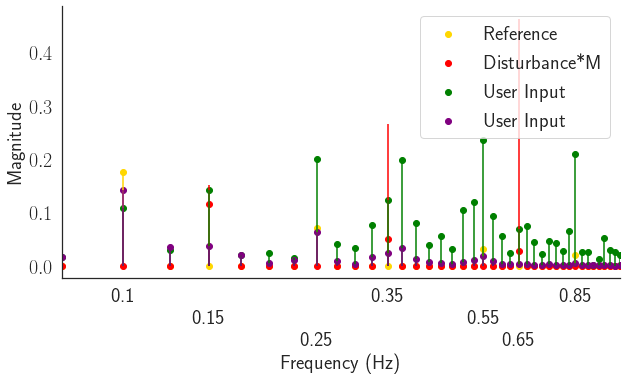

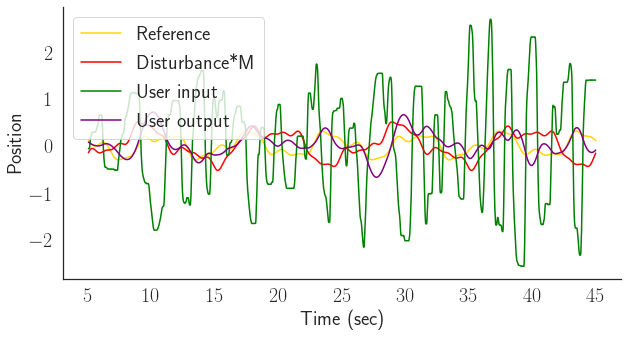

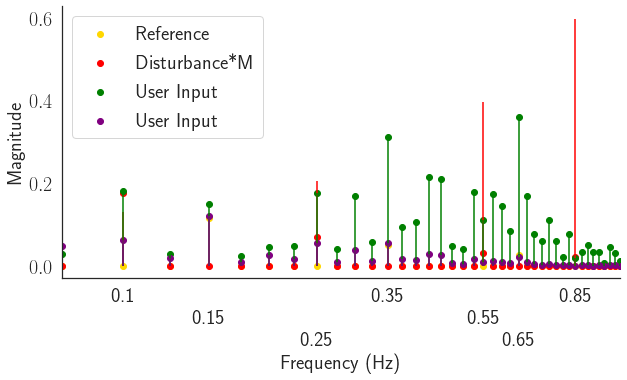

In [8]:
# plot time-domain data
def plot_timedata(timedomaindata):
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111)
    plt.plot(timedomaindata['times'],timedomaindata['refs'],color='gold',label='Reference')
    plt.plot(timedomaindata['times'],(timedomaindata['dists']),color='red',label='Disturbance*M')
    plt.plot(timedomaindata['times'],timedomaindata['inps'],color='green',label='User input')
    plt.plot(timedomaindata['times'],timedomaindata['outs'],color='purple',label='User output')
    plt.xlabel('Time (sec)')
    plt.ylabel('Position')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.show()
    
def plot_freqdata(freqdata):
    plt.figure(figsize=(10,5))
    ax = plt.subplot(111)

    plt.scatter(freq/20.0,abs(freqdata['REFS']),color='gold',label='Reference')
    #plt.scatter(freq/20.0,abs(freqdata['DISTSnoM']),color='red',label='Disturbance (without M)')
    plt.scatter(freq/20.0,abs(freqdata['DISTS']),color='red',label='Disturbance*M')
    plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['REFS']),color='gold')
    plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['DISTSnoM']),color='red')
    plt.scatter(freq/20.0,abs(freqdata['INPS']),color='green',label='User Input')
    plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['INPS']),color='green')
    plt.scatter(freq/20.0,abs(freqdata['OUTS']),color='purple',label='User Input')
    plt.vlines(freq/20.0,np.zeros((len(freq),)),abs(freqdata['OUTS']),color='purple')

    plt.ylabel('Magnitude')
    ax.set_xscale("log", nonposx='clip')
    #ax.set_yscale("log", nonposy='clip')

    ax.set_xticks(soIX/2.0/20)
    labels = ax.set_xticklabels((soIX/2.0/20))
    for i, label in enumerate(labels):
        label.set_y(label.get_position()[1] - (i % 3) * 0.08)
    plt.xlabel('Frequency (Hz)')
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    plt.legend()
    plt.xlim((1.5/20,21.0/20))
    plt.show()

# plot even data
plot_timedata(time_valuesEven)
plot_freqdata(freq_valuesEven)

# plot odd data
plot_timedata(time_valuesOdd)
plot_freqdata(freq_valuesOdd)